# **2 – Visual Study**

## Objectives

* Explore the cherry leaf image dataset visually
* Differentiate between healthy and powdery mildew-infected leaves
* Support Business Requirement #1 through image analysis and insights

## Inputs

* Images located in -  inputs/dataset/raw/cherry-leaves/
* Subfolders - healthy/, powdery_mildew/

## Outputs

* Image count per class
* Sample images from each class
* Average and variability images
* Images displayed to illustrate visual patterns




--- 

# Change working directory

Change the working directory from its current folder to its parent folder

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\amyno\\OneDrive\\Documents\\CherryLeafProject\\milestone-project-mildew-detection-in-cherry-leaves\\jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\amyno\\OneDrive\\Documents\\CherryLeafProject\\milestone-project-mildew-detection-in-cherry-leaves'

---

# Count of images per class


In this section, I count how many images exist for each class (healthy vs powdery mildew).
This helps confirm the dataset is balanced and gives context for later modeling.

Set path to image folders

In [4]:
image_path = "inputs/dataset/raw/cherry-leaves"
class_names = os.listdir(image_path)

Determine no. of images per class

In [5]:
for class_name in class_names:
    class_dir = os.path.join(image_path, class_name)
    image_count = len(os.listdir(class_dir))
    print(f"{class_name}: {image_count} images")

healthy: 2104 images
powdery_mildew: 2104 images


This shows that there is the same amount of healthy and diseased images to analyse. This is important as it shows that the data sets are even and there is no skew in favour of either class. 

It also shows that there is a healthy amount of data to work with. 2104 images per class allows more than enough data to train, test and validate the model.

---

# Sample images from each class

I will take a random sample of 5 images from each of the classes, healthy and diseased. This will demonstrate the visual differences and help to ensure the data is accurate 

import os for the file paths, random to enable random choosing of the images, Python Imaging Library to load the images, and MatPlotLib to display those images

In [7]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------------------- -------- 6.3/8.1 MB 32.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 29.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

set folder for images and define both classes

In [10]:
base_path = "inputs/dataset/raw/cherry-leaves"

classes = ["healthy", "powdery_mildew"]

Create a dictionary to hold 5 random images per class

In [11]:
sample_images = {}

for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    all_images = os.listdir(folder_path)
    sample_images[class_name] = random.sample(all_images, 5)

Use Matplotlib to show 10 images: 5 from each class. Healthy leaves are on the top row, powdery mildew on the bottom row


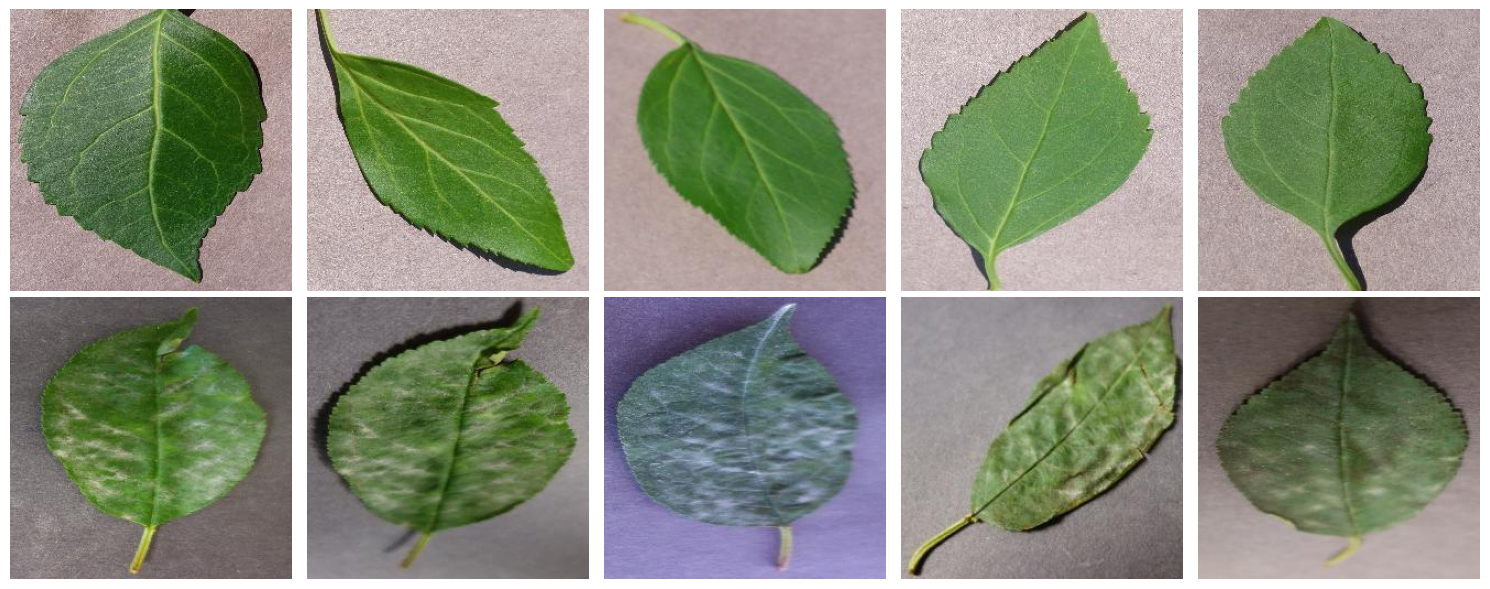

In [ ]:
plt.figure(figsize=(15, 6))

for row, class_name in enumerate(classes):
    for col, img_name in enumerate(sample_images[class_name]):
        img_path = os.path.join(base_path, class_name, img_name)
        img = Image.open(img_path)

        plt.subplot(2, 5, row * 5 + col + 1) 
        plt.imshow(img)
        plt.axis('off')

plt.tight_layout()
plt.show()

The sample images show a clear difference between a healthy and a diseased cherry leaf. 

---

# Averge image per class

This section generates an average image for each class by combining pixel values from all images and dividing by the total count

The goal is to highlight common patterns in each class and help visually identify what a "typical" healthy or diseased leaf might look like.

Import numpy

In [13]:
import numpy as np


Create the average image for a given class by resizing, adding and averaging all images in that folder

In [16]:
def calculate_average_image(class_name, image_size=(100, 100)):
 
    folder_path = os.path.join("inputs/dataset/raw/cherry-leaves", class_name)
    images = os.listdir(folder_path)
    
    avg_array = np.zeros((image_size[1], image_size[0], 3), dtype=np.float32)

    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path).resize(image_size).convert("RGB")
        avg_array += np.array(img)

    avg_array /= len(images)
    avg_image = Image.fromarray(np.uint8(avg_array))

    return avg_image


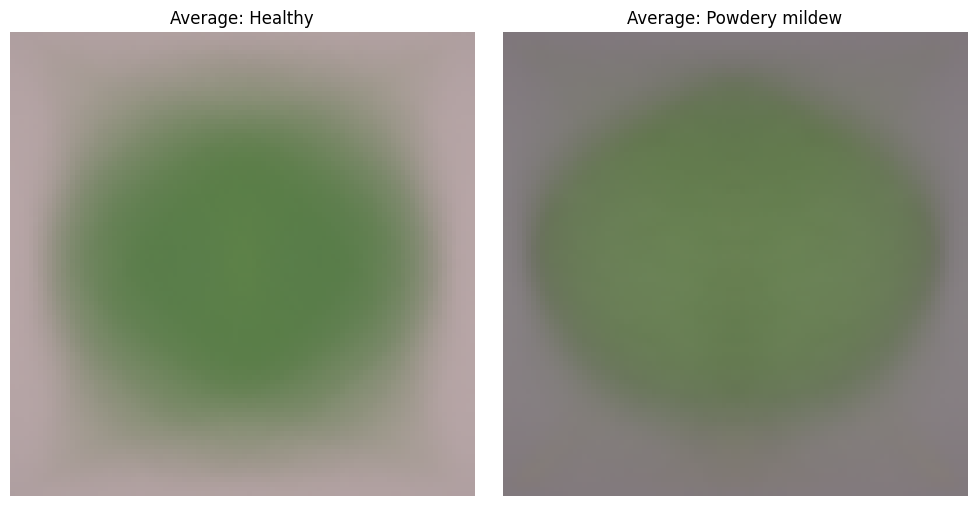

In [17]:
plt.figure(figsize=(10, 5))

for i, class_name in enumerate(["healthy", "powdery_mildew"]):
    avg_img = calculate_average_image(class_name)
    
    plt.subplot(1, 2, i + 1)
    plt.imshow(avg_img)
    plt.axis("off")
    plt.title(f"Average: {class_name.replace('_', ' ').capitalize()}")

plt.tight_layout()
plt.show()


---

# Conclusions and next steps

## Conclusions

* Determined the amount of images in each class of the dataset and am satisfied there is a sufficient amount of data
* Sampled and displayed 5 random images from each class, every image was clearly either healthy or suffering from powdery mildew
* Displayed those images side by side and all images were in the group they were expected to be in


## Next steps

* Generate average images and variability images for each class
* Begin data preparation and cleaning steps for modelling